In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<br></br>
## KNeighborsClassifier

In [2]:
d4p_knn = pd.read_csv('sklearn_benchmarks/results/daal4py/KNeighborsClassifier.csv')

In [3]:
skl_knn = pd.read_csv('sklearn_benchmarks/results/sklearn/KNeighborsClassifier.csv')

In [4]:
merged_df_knn = skl_knn.merge(d4p_knn, on=['estimator', 'function', 'n_samples', 'n_features', 'algorithm', 'n_jobs', 'n_neighbors'], suffixes=['_skl', '_d4p'])

In [5]:
merged_df_knn['speedup'] = merged_df_knn['mean_time_elapsed_skl'] / merged_df_knn['mean_time_elapsed_d4p']

In [173]:
1%2

1

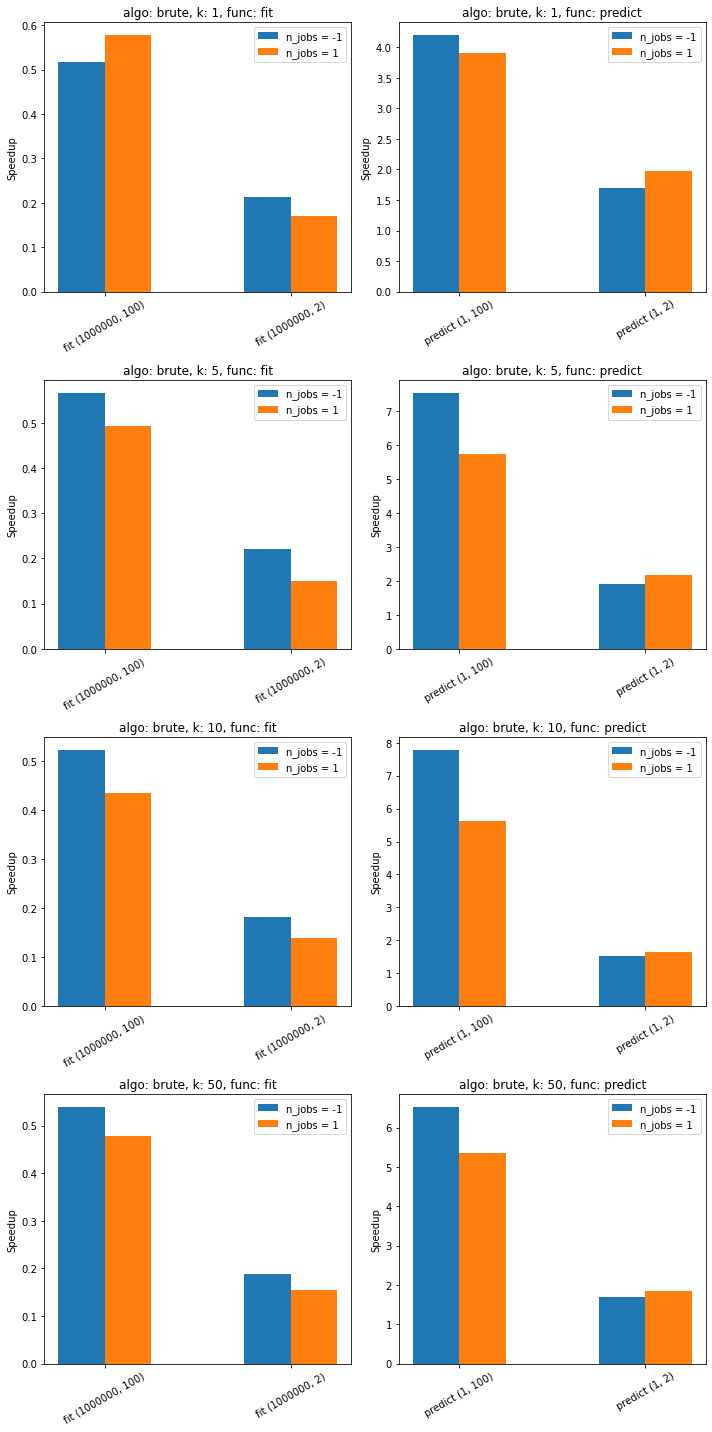

In [174]:
BAR_WIDTH = .25
merged_df_knn_grouped = merged_df_knn.groupby(['algorithm', 'n_neighbors', 'function'])
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()
for (params, df), ax in zip(merged_df_knn_grouped, axes):
    df = df.loc[(df.n_samples + df.n_features).sort_values().index]
    n_jobs_vals = df['n_jobs'].unique()
    n_bars = len(n_jobs_vals)
    for i, val in enumerate(n_jobs_vals):
        x = np.arange(n_bars)
        n_bars = len(n_jobs_vals)
        if i % 2 == 0:
            x = x - BAR_WIDTH / n_bars
        else:
            x = x + BAR_WIDTH / n_bars
        height = df['speedup'][df['n_jobs'] == val]
        label="n_jobs = %s" % val
        ax.bar(x, height=height, width=BAR_WIDTH, label=label, align='edge')
    title = "algo: %s, k: %s, func: %s" % params
    ax.set_title(title)
    ax.set_xticks(x)
    labels = ["%s (%s, %s)" % tuple(row) for row in df[['function', 'n_samples', 'n_features']].values]
    labels = np.unique(labels)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_ylabel('Speedup')
    ax.legend()
fig.tight_layout()

<br></br>
## KMeans

In [8]:
d4p_kmeans = pd.read_csv('sklearn_benchmarks/results/daal4py/KMeans.csv')
d4p_kmeans.head()

,estimator,lib,function,mean_time_elapsed,std_time_elapsed,n_reps,n_samples,n_features,init,max_iter,n_clusters,n_init,tol,n_iter,adjusted_rand_score
0,KMeans,daal4py,fit,0.002507,0.000891,10.0,10000,2,k-means++,30,3,1,1.000000e-16,13.0,NaN
1,KMeans,daal4py,predict,0.000148,0.000021,NaN,1000,2,k-means++,30,3,1,1.000000e-16,NaN,1.000000
2,KMeans,daal4py,predict,0.000108,0.000015,NaN,1,2,k-means++,30,3,1,1.000000e-16,NaN,1.000000
3,KMeans,daal4py,fit,0.004251,0.001385,10.0,10000,2,k-means++,30,8,1,1.000000e-16,30.0,NaN
4,KMeans,daal4py,predict,0.000165,0.000039,NaN,1000,2,k-means++,30,8,1,1.000000e-16,NaN,0.461358


In [9]:
skl_kmeans = pd.read_csv('sklearn_benchmarks/results/sklearn/KMeans.csv')

In [10]:
merged_df_kmeans = skl_kmeans.merge(d4p_kmeans, on=['estimator', 'function', 'n_samples', 'n_features', 'init', 'max_iter', 'n_clusters', 'n_init', 'tol'], suffixes=['_skl', '_d4p'])

In [11]:
merged_df_kmeans['speedup'] = merged_df_kmeans['mean_time_elapsed_skl'] / merged_df_kmeans['mean_time_elapsed_d4p']

In [12]:
merged_df_kmeans.sort_values('speedup', ascending=False)

,estimator,lib_skl,function,mean_time_elapsed_skl,std_time_elapsed_skl,n_reps_skl,n_samples,n_features,init,max_iter,...,tol,n_iter_skl,adjusted_rand_score_skl,lib_d4p,mean_time_elapsed_d4p,std_time_elapsed_d4p,n_reps_d4p,n_iter_d4p,adjusted_rand_score_d4p,speedup
113,KMeans,sklearn,fit,1.813230,0.004977,10.0,1000000,2,random,30,...,1.000000e-16,30.0,NaN,daal4py,0.128316,0.004390,10.0,30.0,NaN,14.130969
112,KMeans,sklearn,fit,1.634943,0.011162,10.0,1000000,2,random,30,...,1.000000e-16,30.0,NaN,daal4py,0.123883,0.005765,10.0,30.0,NaN,13.197499
110,KMeans,sklearn,fit,2.236079,0.051481,10.0,1000000,2,k-means++,30,...,1.000000e-16,30.0,NaN,daal4py,0.201940,0.012728,10.0,30.0,NaN,11.072987
109,KMeans,sklearn,fit,1.962452,0.053600,10.0,1000000,2,k-means++,30,...,1.000000e-16,30.0,NaN,daal4py,0.182519,0.013418,10.0,30.0,NaN,10.752038
36,KMeans,sklearn,fit,0.026909,0.003183,10.0,10000,2,random,30,...,1.000000e-16,30.0,NaN,daal4py,0.002662,0.000172,10.0,30.0,NaN,10.108011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,KMeans,sklearn,predict,0.000436,0.000041,NaN,1000,100,random,30,...,1.000000e-16,NaN,1.000000,daal4py,0.000411,0.000112,NaN,NaN,1.000000,1.060305
96,KMeans,sklearn,predict,0.000170,0.000023,NaN,1,100,random,30,...,1.000000e-16,NaN,0.456426,daal4py,0.000167,0.000057,NaN,NaN,0.484599,1.021271
68,KMeans,sklearn,predict,0.000175,0.000021,NaN,1,100,k-means++,30,...,1.000000e-16,NaN,0.454298,daal4py,0.000179,0.000069,NaN,NaN,0.459116,0.977866
88,KMeans,sklearn,predict,0.000176,0.000025,NaN,1,100,random,30,...,1.000000e-16,NaN,1.000000,daal4py,0.000189,0.000077,NaN,NaN,1.000000,0.930289


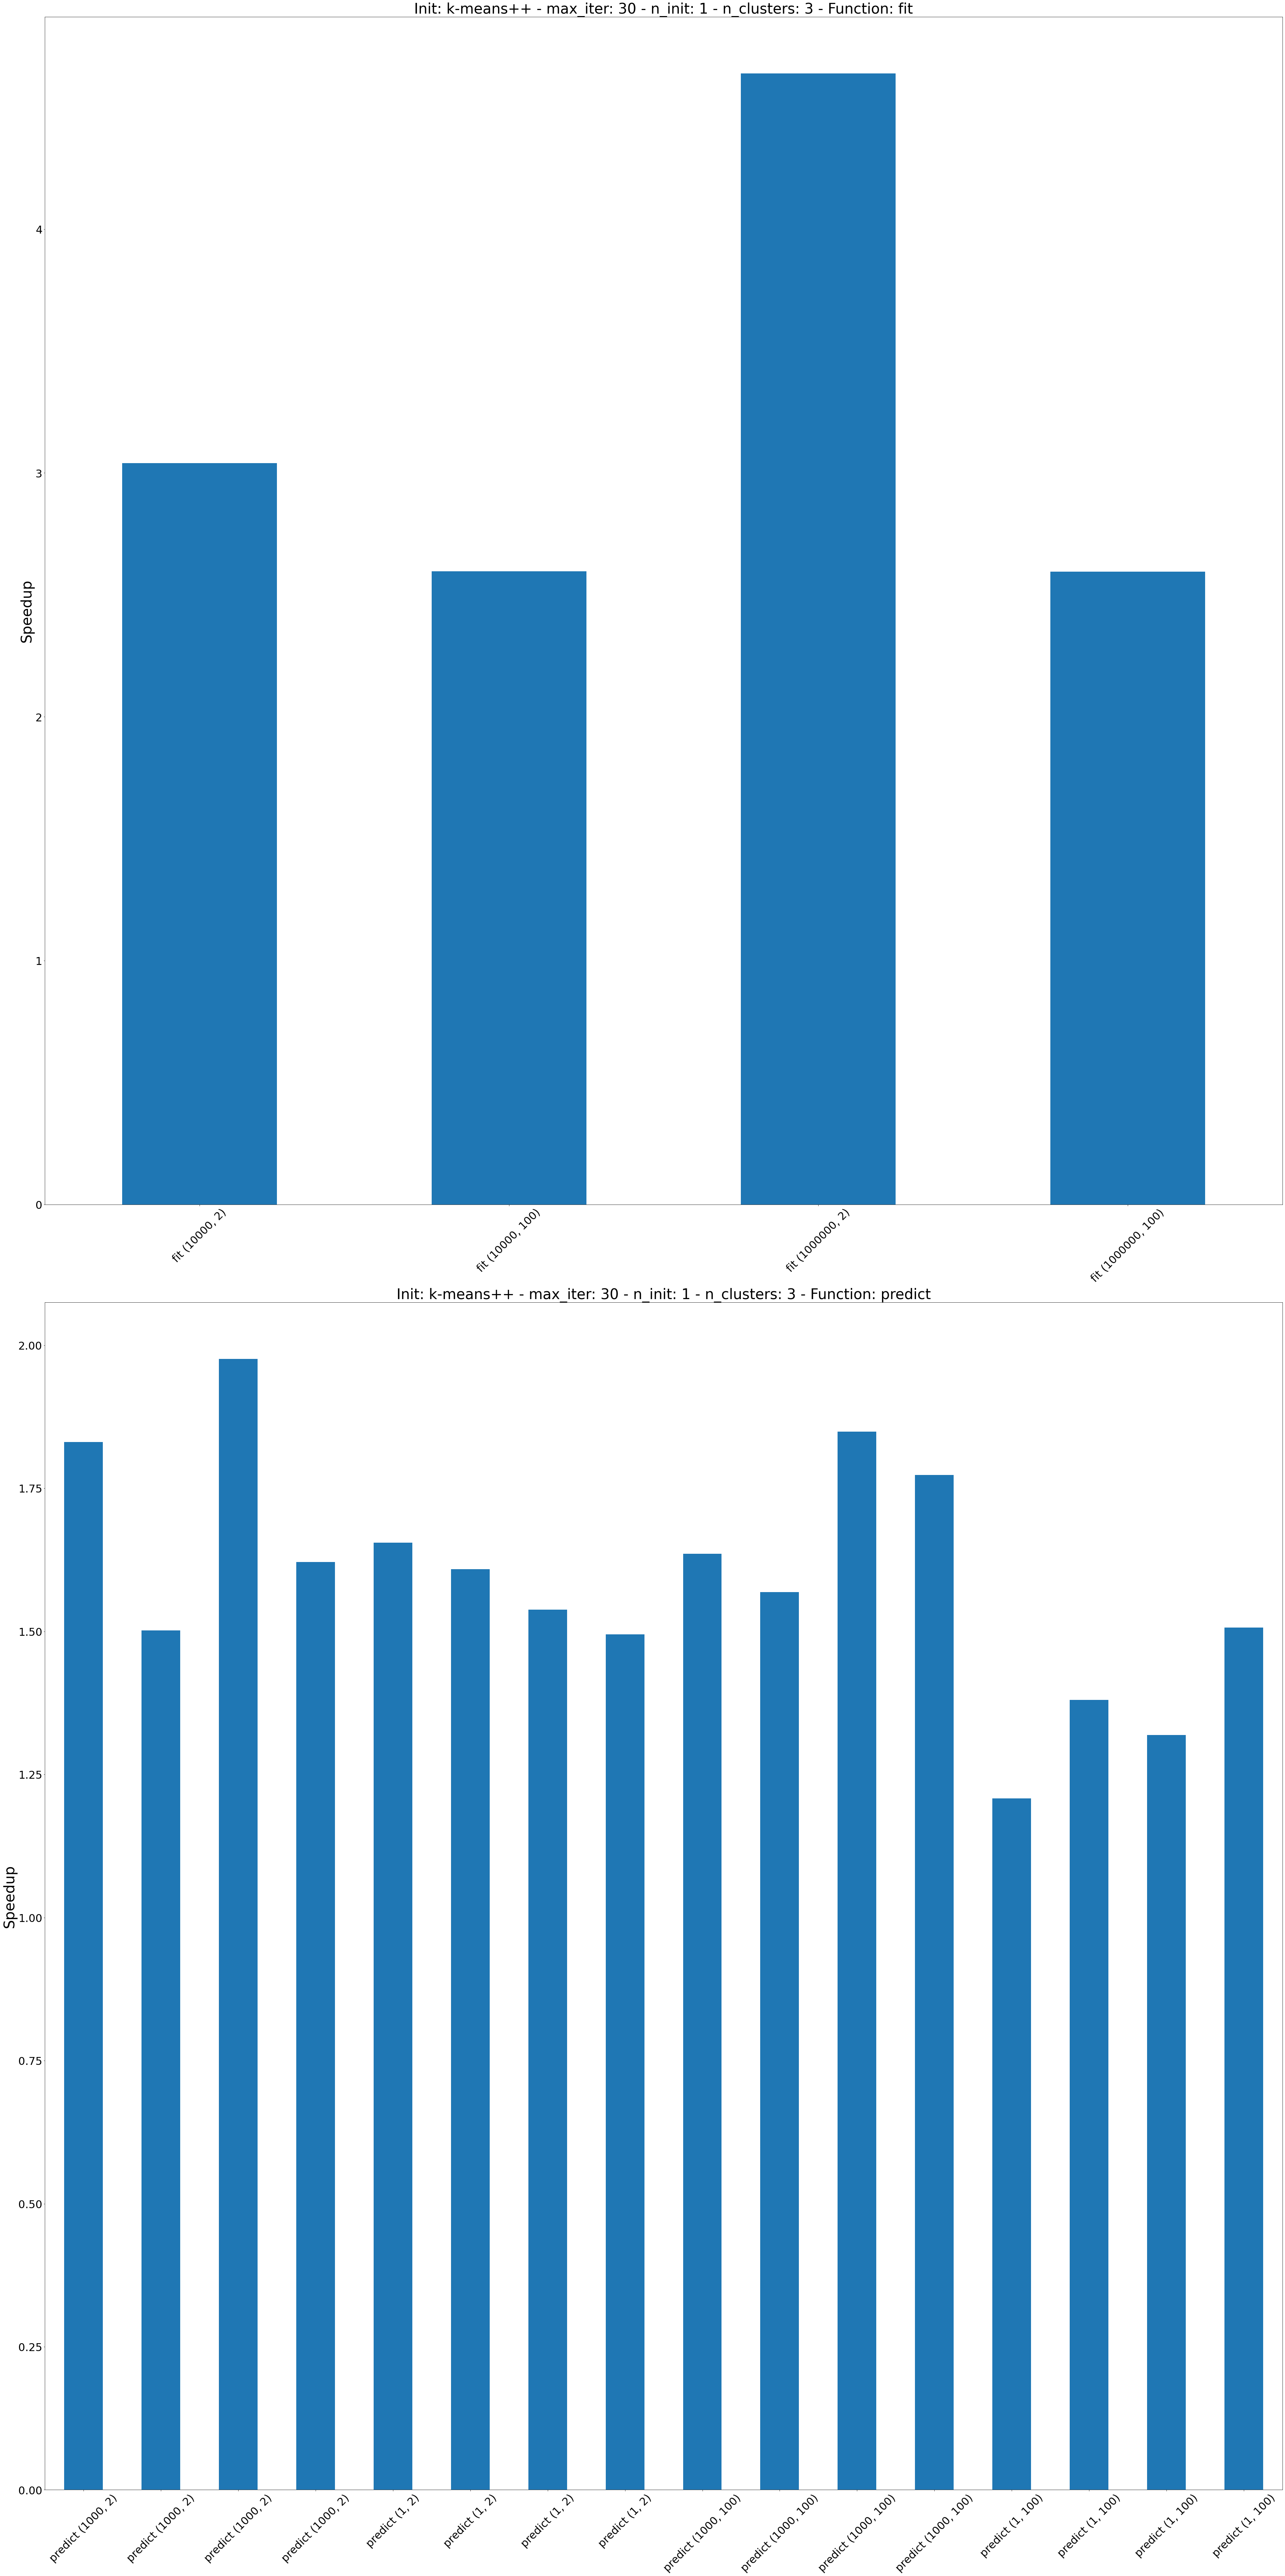

In [13]:
merged_df_kmeans_grouped = merged_df_kmeans.groupby(['init', 'max_iter', 'n_init', 'n_clusters', 'function'])
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(50, 100))
axes = axes.flatten()
for (params, df), ax in zip(merged_df_kmeans_grouped, axes):
    df['speedup'].plot.bar(ax=ax)
    title = "Init: %s - max_iter: %s - n_init: %s - n_clusters: %s - Function: %s" % params
    ax.set_title(title, fontdict={'fontsize': 40})
    ax.set_ylabel('Speedup', fontdict={'fontsize': 40})
    ax.tick_params(axis='both', which='major', labelsize=30)
    labels = [f"{func} ({ns}, {nf})" for func, ns, nf in df[['function', 'n_samples', 'n_features']].to_numpy()]
    ax.set_xticklabels(labels=labels)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
plt.tight_layout();